In [66]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

taxi_averages = pd.read_csv('data/taxi_averages.csv')
events_cluster = pd.read_csv('data/events_cluster.csv')
taxi_hourly = pd.read_csv('data/taxi_hourly_aggregates.csv')

In [67]:
taxi_hourly['date'] = pd.to_datetime(taxi_hourly['date']).dt.dayofyear
events_cluster['date'] = pd.to_datetime(events_cluster['date']).dt.dayofyear


In [88]:
t_hourly_gropued = taxi_hourly.groupby(['zipcode', 'hour'])
stats = t_hourly_gropued['count'].agg([np.sum, np.min, np.max, np.mean, np.std]).sort_values('mean', ascending =False)

stats = stats.dropna().query('mean > 1 & std > 200 & hour == 20' )
stats

,,sum,amin,amax,mean,std
zipcode,hour,,,,,
10019,20,700190,715,3064,1918.328767,459.971143
10022,20,631766,440,2792,1730.865753,531.019180
10001,20,628959,545,2356,1723.175342,242.905528
10003,20,594318,551,2585,1628.268493,358.282064
10011,20,545697,360,2282,1495.060274,358.081935
10016,20,529882,423,2174,1451.731507,329.478816
10017,20,454732,391,1984,1245.841096,321.751520
10014,20,360059,241,1667,986.463014,233.150948
10010,20,317624,272,1290,870.202740,211.712867


In [69]:
taxi_averages.query('(zipcode == 10022) & (hour == 21)')

,zipcode,hour,average
4142,10022,21,1666.389041


[1.5382436260623229, 1.463611497242276, 1.8464352119974397, 1.5270873167622689, 1.5081062949573256, 1.6331821127673363, 1.7831761209458585, 1.7099190890020979, 1.700854322517817, 1.6643291257597008]
[2.588235294117647, 0.8, 2.6341463414634148, 0.0, 0.6956521739130435, 1.0, 1.68, 4.653846153846153, 1.5625, 2.526315789473684]


<IPython.core.display.Javascript object>


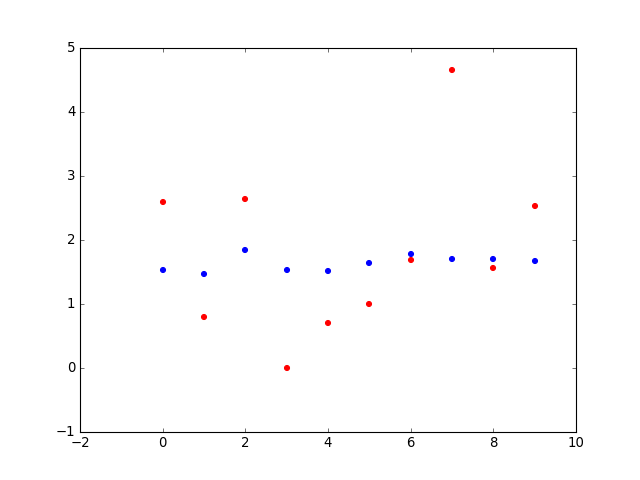

In [141]:
zipcodes = list(set([10019, 10022, 10001, 10003, 10011, 10016, 10017, 10014, 10010, 10065]))
hour = 19
date = 322

#fig, ax = plt.subplots()
#fig.set_size_inches()

ind = np.arange(len(zipcodes))
width = 0.35

taxiMeans = []
eventMeans = []
for zipcode in zipcodes:
    taxi_val = taxi_hourly.query('(zipcode == {0}) & (hour == {1}) & (date == {2})'.format(zipcode, hour, date)).as_matrix()[0][3]
    event_val = np.sum(events_cluster.query('(zipcode == \'{0}\') & (hour == {1}) & (date == {2})'.format(zipcode, hour, date)).as_matrix()[:,3])
    taxi_mean = np.mean(taxi_hourly.query('(zipcode == {0}) & (date == {1})'.format(zipcode, date)).as_matrix()[:,3])
    event_mean = np.mean(events_cluster.query('(zipcode == \'{0}\') & (date == {1})'.format(zipcode, date)).as_matrix()[:,3])
    
    taxiMeans.append(taxi_val/taxi_mean)
    eventMeans.append(event_val/event_mean)
    
print(taxiMeans)
print(eventMeans)

plt.scatter(range(0, len(zipcodes)), taxiMeans, color='b')
plt.scatter(range(0, len(zipcodes)), eventMeans, color='r')

In [118]:
np.mean(taxi_hourly.query('(zipcode == {0}) & (date == {1})'.format(zipcode, date)).as_matrix()[:,3])

534.75

In [121]:
np.mean(events_cluster.query('(zipcode == \'{0}\') & (date == {1})'.format(zipcode, date)).as_matrix()[:,3])

2.375

In [134]:
taxi_hourly.query('(zipcode == {0}) & (date == {1})'.format(zipcode, date)).as_matrix()[:,3]

array([403, 291, 219, 170,  90, 131, 332, 528, 728, 824, 559, 470, 482,
       467, 504, 496, 339, 488, 741, 890, 906, 997, 880, 899])